In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from sklearn.utils import shuffle

import os
for dirname, _, filenames in os.walk('../Dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



../Dataset/agripada.csv
../Dataset/andheri.csv
../Dataset/bandra_east.csv
../Dataset/bandra_west.csv
../Dataset/borivali_west.csv
../Dataset/chembur.csv
../Dataset/chembur_east.csv
../Dataset/colaba.csv
../Dataset/cst.csv
../Dataset/dadar.csv
../Dataset/ghatkopar.csv
../Dataset/ghatkopar_east.csv
../Dataset/ghatkopar_west.csv
../Dataset/goregaon.csv
../Dataset/gowandi.csv
../Dataset/juhu.csv
../Dataset/kandivali_east.csv
../Dataset/kandivali_west.csv
../Dataset/khar.csv
../Dataset/khar_west.csv
../Dataset/kurla.csv
../Dataset/malad.csv
../Dataset/mulund.csv
../Dataset/mulund_east.csv
../Dataset/mulund_west.csv
../Dataset/mumbai_central.csv
../Dataset/nagpada.csv
../Dataset/parel.csv
../Dataset/sewree.csv
../Dataset/trombay.csv
../Dataset/vikhroli.csv
../Dataset/vikhroli_east.csv
../Dataset/vile_parle.csv
../Dataset/ward_level_collated.csv
../Dataset/worli.csv


In [6]:
tf.random.set_seed(10)
np.random.seed(10)

In [9]:
dataFrame = pd.read_csv('../Dataset/kurla.csv')

In [10]:
dataFrame

,LOCALITY,S_D,S_M,MALARIA,DENGUE,CHICKENGUNIA,VIRAL_FEVER,FLU,TUBERCULOSIS,DIARROHEA,...,JAUNDICE,TEMP_C,RAIN_MM,AQI,CHEMBUR_EAST_DIARROHEA,CHEMBUR_EAST_TYPHOID,CHEMBUR_EAST_CHOLERA,CHEMBUR_EAST_JAUNDICE,JUHU_T,VIKHROLI_T
0,KURLA,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,26.09,0.0,159.500000,0.0,0.000000,0.00,0.000000,0.0,0.0
1,KURLA,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,26.20,0.0,150.566667,0.0,0.000000,0.00,0.000000,0.0,0.0
2,KURLA,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,26.68,0.0,152.066667,0.0,0.000000,0.00,0.000000,0.0,0.0
3,KURLA,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,27.84,0.0,124.200000,0.0,0.000000,0.00,0.000000,0.0,0.0
4,KURLA,5,1,6.0,6.0,1.0,0.0,0.0,0.0,0.0,...,0.0,29.06,0.0,94.230000,0.0,0.000000,0.00,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,KURLA,27,12,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,3.0,28.36,0.0,157.833333,0.5,0.333333,0.25,0.333333,0.0,0.0
361,KURLA,28,12,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,3.0,29.33,0.0,136.800000,0.5,0.333333,0.25,0.333333,0.0,0.0
362,KURLA,29,12,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,3.0,31.07,0.0,151.700000,0.5,0.333333,0.25,0.333333,0.0,0.0
363,KURLA,30,12,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,3.0,30.43,0.0,163.720000,0.5,0.333333,0.25,0.333333,0.0,0.0


In [11]:
X_axis = dataFrame[['S_D', 'S_M', 'TEMP_C', 'RAIN_MM', 'AQI']]
Y_axis = dataFrame[['MALARIA', 'DENGUE', 'CHICKENGUNIA']]
X_axis

,S_D,S_M,TEMP_C,RAIN_MM,AQI
0,1,1,26.09,0.0,159.500000
1,2,1,26.20,0.0,150.566667
2,3,1,26.68,0.0,152.066667
3,4,1,27.84,0.0,124.200000
4,5,1,29.06,0.0,94.230000
...,...,...,...,...,...
360,27,12,28.36,0.0,157.833333
361,28,12,29.33,0.0,136.800000
362,29,12,31.07,0.0,151.700000
363,30,12,30.43,0.0,163.720000


In [12]:
X_axis = X_axis.astype(float)
Y_axis = Y_axis.astype(float)
X_axis, Y_axis = shuffle(X_axis, Y_axis)
X_axis
X_axis.shape[0] #390
X_axis.shape[1] #19

5

In [13]:
X_train = (X_axis.to_numpy()[:300]).reshape(300, 1, X_axis.shape[1]) #3D matrix 300 arrays each with 1 array each with 19 cols
print(X_train.shape)
#X_train = shuffle(X_train)
Y_train = (Y_axis.to_numpy()[:300])
print(Y_train.shape)
#Y_train = shuffle(Y_train)

(300, 1, 5)
(300, 3)


In [14]:
X_val = (X_axis.to_numpy()[300:345]).reshape(45, 1, X_axis.shape[1]) #3D matrix 50 arrays each with 1 array each with 19 cols
print(X_val.shape)
Y_val = (Y_axis.to_numpy()[300:345])
print(Y_val.shape)

(45, 1, 5)
(45, 3)


In [15]:
X_test = (X_axis.to_numpy()[345:]).reshape(X_axis.to_numpy()[345:].shape[0], 1, X_axis.shape[1])
print(X_test.shape)
Y_test = (Y_axis.to_numpy()[345:])
print(Y_test.shape)

(20, 1, 5)
(20, 3)


In [16]:
modelname = './kurlaregion/modelkurlaregion.cpkt'
modelpath = modelname
modeldir = os.path.dirname(modelpath)
callback = tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, save_weights_only=True)

In [17]:
model = keras.Sequential()
model.add(layers.LSTM(10, return_sequences=True))
model.add(layers.LSTM(25, return_sequences=True))
model.add(layers.SimpleRNN(25))
model.add(layers.Dense(3))

In [18]:
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=95, callbacks=[callback])

Epoch 1/95
10/10 [==============================] - 6s 130ms/step - loss: 3.0712 - accuracy: 0.4124 - val_loss: 2.3602 - val_accuracy: 0.0889
Epoch 2/95
10/10 [==============================] - 0s 14ms/step - loss: 2.2734 - accuracy: 0.1479 - val_loss: 2.2267 - val_accuracy: 0.0667
Epoch 3/95
10/10 [==============================] - 0s 13ms/step - loss: 2.0543 - accuracy: 0.1621 - val_loss: 2.0972 - val_accuracy: 0.0667
Epoch 4/95
10/10 [==============================] - 0s 14ms/step - loss: 2.2193 - accuracy: 0.0997 - val_loss: 1.9764 - val_accuracy: 0.0444
Epoch 5/95
10/10 [==============================] - 0s 14ms/step - loss: 2.2814 - accuracy: 0.0557 - val_loss: 1.8834 - val_accuracy: 0.0444
Epoch 6/95
10/10 [==============================] - 0s 14ms/step - loss: 2.1091 - accuracy: 0.0664 - val_loss: 1.8367 - val_accuracy: 0.0444
Epoch 7/95
10/10 [==============================] - 0s 14ms/step - loss: 1.9510 - accuracy: 0.0507 - val_loss: 1.8344 - val_accuracy: 0.1333
Epoch 8/95
1

In [19]:
validation_loss, validation_accuracy = model.evaluate(X_val, Y_val)
print("Validation loss: {0:.4f}, Validation accuracy: {1:.4}".format(validation_loss, validation_accuracy))

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Final loss: {0:.4f}, final accuracy: {1:.4}".format(test_loss, test_accuracy))

2/2 [==============================] - 0s 4ms/step - loss: 0.5739 - accuracy: 0.4889
Validation loss: 0.5739, Validation accuracy: 0.4889
1/1 [==============================] - 0s 21ms/step - loss: 1.8853 - accuracy: 0.7000
Final loss: 1.8853, final accuracy: 0.7


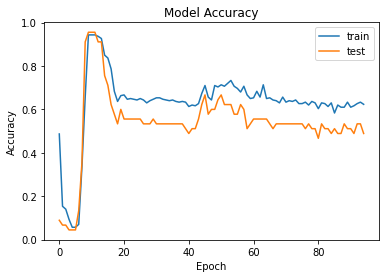

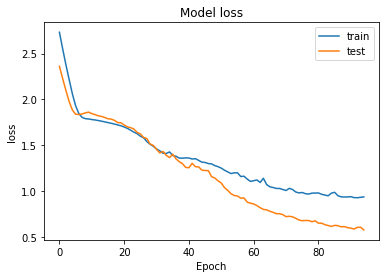

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(loc='upper right')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()

<Figure size 432x288 with 0 Axes>

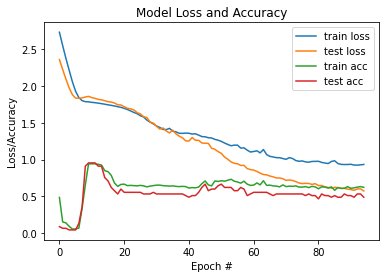

<Figure size 432x288 with 0 Axes>

In [21]:

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='test acc')
plt.title("Model Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")
plt.figure()

In [22]:
model = keras.Sequential()
model.add(layers.GRU(10, return_sequences=True))
model.add(layers.GRU(25, return_sequences=True))
model.add(layers.SimpleRNN(25))
model.add(layers.Dense(3))

In [23]:
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=95)

Epoch 1/95
10/10 [==============================] - 5s 63ms/step - loss: 3.2179 - accuracy: 0.9515 - val_loss: 2.2439 - val_accuracy: 0.9556
Epoch 2/95
10/10 [==============================] - 0s 8ms/step - loss: 2.0775 - accuracy: 0.9385 - val_loss: 1.9604 - val_accuracy: 0.9556
Epoch 3/95
10/10 [==============================] - 0s 7ms/step - loss: 1.7405 - accuracy: 0.9167 - val_loss: 1.8323 - val_accuracy: 0.9556
Epoch 4/95
10/10 [==============================] - 0s 7ms/step - loss: 1.8388 - accuracy: 0.9360 - val_loss: 1.8384 - val_accuracy: 0.9556
Epoch 5/95
10/10 [==============================] - 0s 8ms/step - loss: 1.9636 - accuracy: 0.9443 - val_loss: 1.8648 - val_accuracy: 0.9556
Epoch 6/95
10/10 [==============================] - 0s 35ms/step - loss: 1.8678 - accuracy: 0.9336 - val_loss: 1.8719 - val_accuracy: 0.9556
Epoch 7/95
10/10 [==============================] - 0s 8ms/step - loss: 1.8895 - accuracy: 0.6325 - val_loss: 1.8462 - val_accuracy: 0.0444
Epoch 8/95
10/10 [

In [24]:
validation_loss, validation_accuracy = model.evaluate(X_val, Y_val)
print("Validation loss: {0:.4f}, Validation accuracy: {1:.4}".format(validation_loss, validation_accuracy))

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Final loss: {0:.4f}, final accuracy: {1:.4}".format(test_loss, test_accuracy))

2/2 [==============================] - 0s 4ms/step - loss: 1.7788 - accuracy: 0.9556
Validation loss: 1.7788, Validation accuracy: 0.9556
1/1 [==============================] - 0s 25ms/step - loss: 2.6364 - accuracy: 0.9500
Final loss: 2.6364, final accuracy: 0.95


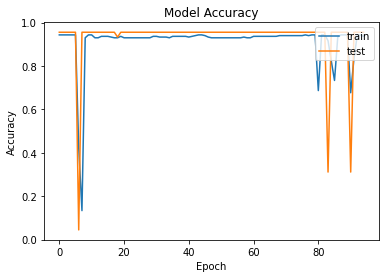

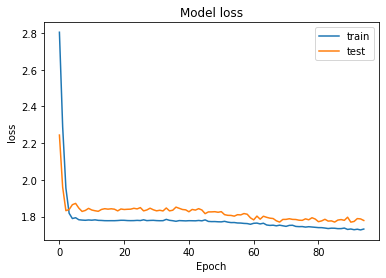

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(loc='upper right')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()

In [26]:
model = keras.Sequential()
model.add(layers.SimpleRNN(10, return_sequences=True))
model.add(layers.SimpleRNN(25, return_sequences=True))
model.add(layers.SimpleRNN(25))
model.add(layers.Dense(3))

In [27]:
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=95)

Epoch 1/95
10/10 [==============================] - 3s 54ms/step - loss: 2.2843 - accuracy: 0.5240 - val_loss: 1.8170 - val_accuracy: 0.9556
Epoch 2/95
10/10 [==============================] - 0s 7ms/step - loss: 1.6022 - accuracy: 0.9385 - val_loss: 1.8911 - val_accuracy: 0.9333
Epoch 3/95
10/10 [==============================] - 0s 7ms/step - loss: 1.6696 - accuracy: 0.4182 - val_loss: 1.8653 - val_accuracy: 0.9333
Epoch 4/95
10/10 [==============================] - 0s 7ms/step - loss: 1.8205 - accuracy: 0.9360 - val_loss: 1.8483 - val_accuracy: 0.9556
Epoch 5/95
10/10 [==============================] - 0s 7ms/step - loss: 1.9504 - accuracy: 0.9443 - val_loss: 1.8290 - val_accuracy: 0.9333
Epoch 6/95
10/10 [==============================] - 0s 8ms/step - loss: 1.8765 - accuracy: 0.9278 - val_loss: 1.8399 - val_accuracy: 0.9556
Epoch 7/95
10/10 [==============================] - 0s 7ms/step - loss: 1.8896 - accuracy: 0.9540 - val_loss: 1.8263 - val_accuracy: 0.9333
Epoch 8/95
10/10 [=

In [28]:
validation_loss, validation_accuracy = model.evaluate(X_val, Y_val)
print("Validation loss: {0:.4f}, Validation accuracy: {1:.4}".format(validation_loss, validation_accuracy))

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Final loss: {0:.4f}, final accuracy: {1:.4}".format(test_loss, test_accuracy))

2/2 [==============================] - 0s 3ms/step - loss: 1.8215 - accuracy: 0.9333
Validation loss: 1.8215, Validation accuracy: 0.9333
1/1 [==============================] - 0s 26ms/step - loss: 2.4688 - accuracy: 0.9000
Final loss: 2.4688, final accuracy: 0.9


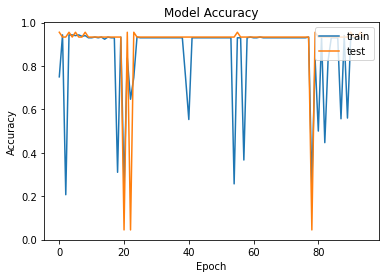

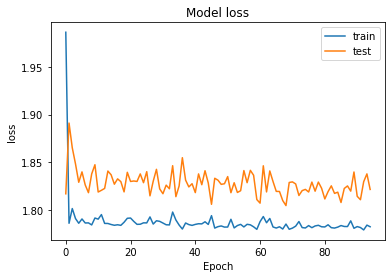

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(loc='upper right')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()

In [30]:
import sys
data=model.predict(np.array([float(28),float(12),float(29.33),float(0.0),float(136.8),float(0.5),float(0.333333333333),float(0.25),float(0.333333333333)]).reshape(1, 1, 9))

ValueError: in user code:

    c:\users\shrav\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    c:\users\shrav\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\shrav\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\shrav\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\shrav\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\shrav\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    c:\users\shrav\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    c:\users\shrav\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\users\shrav\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer sequential_2: expected shape=(None, None, 5), found shape=(None, 1, 9)


In [ ]:
data